Exploring the Orthogonal Viewer
===============================

The Orthogonal Viewer is a convenient tool for making quick visualizations of 3D voxel images.
In this tutorial, we'll explore how to use the ``Orthogonal Viewer`` class. For detailed documentation,
see the corresponding [OrthogonalViewer API document](../../api/viz/orthogonal_viewer.rst), which 
includes comprehensive information about available methods and properties.

Throughout this tutorial, you will learn how to visualize orthogonal slices, interact with the data, 
and customize your visualizations for better insights.

Initial view
------------

First, let's open the Bentheimer sandstone data [imported before](./import_bentheimer_sandstone.ipynb)
and create a simple instance of the OrthogonalViewer.

[2025-01-09 12:36:09] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 40.32chunk/s]
[2025-01-09 12:36:09] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:02<00:00,  2.91chunk/s]


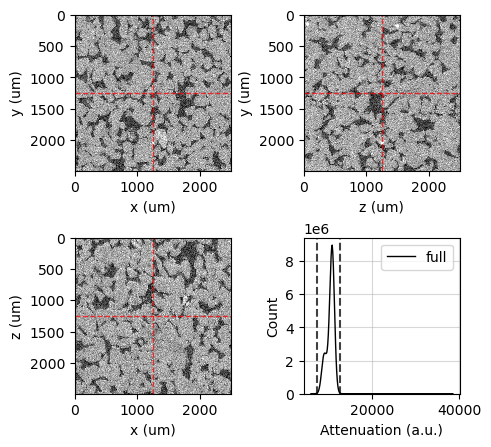

In [30]:
import rockverse as rv
bentheimer_ct = rv.open('/path/to/imported/Bentheimer/original')
viewer = rv.OrthogonalViewer(image=bentheimer_ct)

The viewer defaults to grayscale slices crossing the center of the image, 
with color limits set to span the 99.9% confidence interval calculated from the 
image histogram. Horizontal and vertical lines in each slice indicate the 
intersection with the corresponding crossing slices.

Note that labels and axes are automatically built using attributes from the 
voxel image`, such as field name, voxel length, voxel origin, and voxel unit.

You can access the Matplotlib figure and axes through the corresponding 
attributes of the `OrthogonalViewer`, detailed in the [OrthogonalViewer API document](../../api/viz/orthogonal_viewer.rst):

- ``figure``
- ``ax_xy``
- ``ax_zy``
- ``ax_xz``
- ``ax_histogram``

For example, let's set the x-limits of the histogram using the `ax_histogram` attribute:

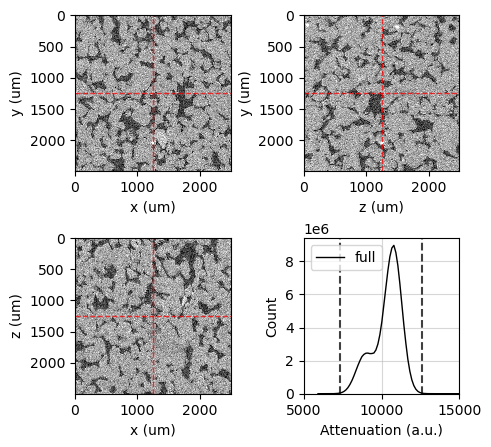

In [31]:
viewer.ax_histogram.set_xlim(5000, 15000)
viewer.figure

The reference point can be any point in the image and is used to determine 
which slice is displayed in the viewer. It can be set by right-clicking with 
the mouse on any image slice while in interactive mode, allowing for quick 
adjustments based on user exploration. 

Additionally, the reference point can also be set through the ``ref_point`` 
attribute using values in voxel length units.

Current reference point: (1250.0, 1250.0, 1250.0)
New reference point: (500.0, 1000.0, 1500.0)


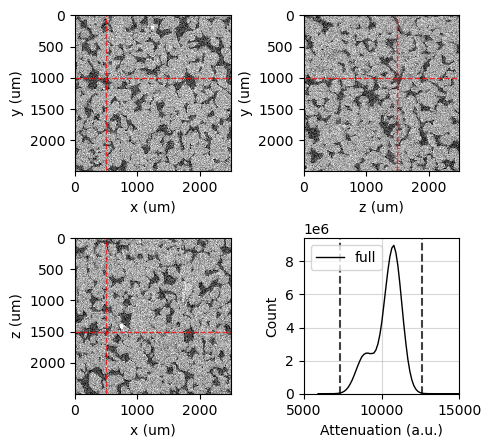

In [32]:
# Print the current reference point to the console
print(f'Current reference point: {viewer.ref_point}')

# Set a new reference point in voxel length units
viewer.ref_point = (500, 1000, 1500)

# Print the updated reference point to confirm the change
print(f'New reference point: {viewer.ref_point}')

# Show the figure in the output
viewer.figure

You can also set the reference point using voxel indices. This allows you to specify 
the reference position in terms of its grid location within the voxel image, which 
can be useful for precise positioning and navigation through the data.

Current reference voxel: (100, 200, 300)
New reference voxel: (125, 250, 375)


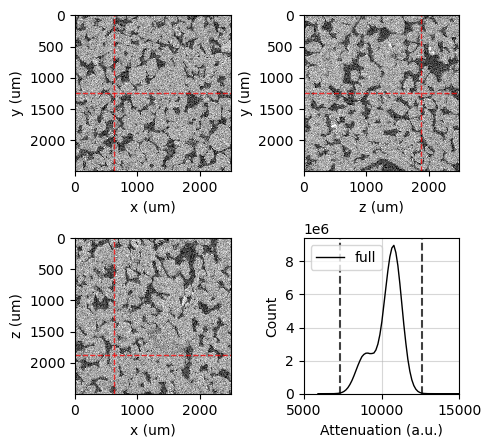

In [33]:
# Print the current reference voxel to the console
print(f'Current reference voxel: {viewer.ref_voxel}')

# Set a new reference voxel using voxel indices (i, j, k)
viewer.ref_voxel = (125, 250, 375)

# Print the updated reference voxel to confirm the change
print(f'New reference voxel: {viewer.ref_voxel}')

# Show the figure in the output
viewer.figure

The ``image_dict`` attribute contains the customization options for the image display.
This dictionary includes parameters such as colormap, transparency (alpha), and color limits (clim). 
You can customize these options using the ``update_image_dict`` method:

Current options: {'cmap': 'gray', 'interpolation': 'none', 'clim': array([ 7337.17191789, 12618.50447666])}
New options: {'cmap': 'Oranges_r', 'interpolation': 'none', 'clim': (7000, 13000)}


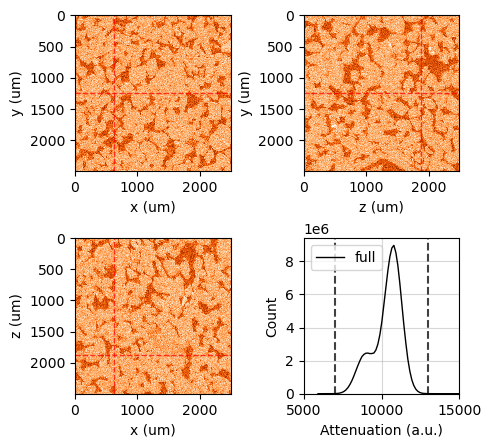

In [34]:
# Print the current image display options to the console
print(f'Current options: {viewer.image_dict}')

# Update the image display settings: set colormap to 'Oranges_r' and adjust color limits
viewer.update_image_dict(cmap='Oranges_r', clim=(7000, 13000))

# Print the updated image display options to confirm the change
print(f'New options: {viewer.image_dict}')

# Show the figure in the output
viewer.figure

The ``clim`` value can also be set by left and right clicking on the histogram axis 
in interactive mode. Left click sets the minimum value and right click sets the 
maximum value. This feature allows for a more dynamic adjustment of the color limits 
based on your visual inspection of the histogram.

Let's revert to grayscale to continue our tutorial:

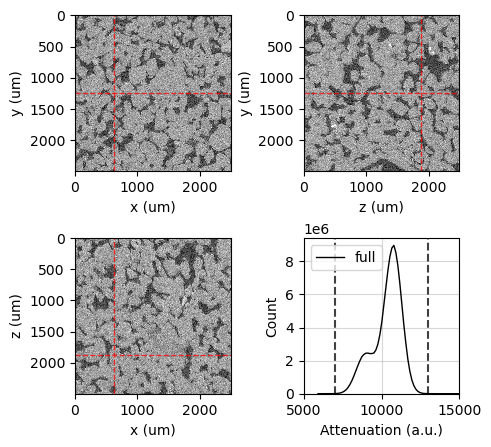

In [35]:
viewer.update_image_dict(cmap='gray', clim=(7000, 13000))
viewer.figure

Guide lines can also be hidden or customized by setting attributes and using 
update methods. The guide lines serve to indicate the intersections between 
the different slices, enhancing the visual analysis of the data.

You can control the visibility of the guide lines using the `show_guide_lines` attribute, 
and customize their appearance through the `guide_line_dict` attribute.

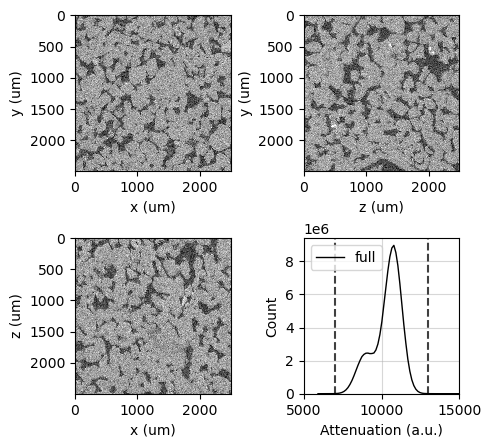

In [36]:
# Enable the visibility of the guide lines
viewer.show_guide_lines = False

# Show the figure in the output
viewer.figure

Current guide_line_dict: {'linestyle': '--', 'color': 'r', 'alpha': 0.75, 'linewidth': 1}
Updated guide_line_dict: {'linestyle': '-', 'color': 'gold', 'alpha': 1, 'linewidth': 1}


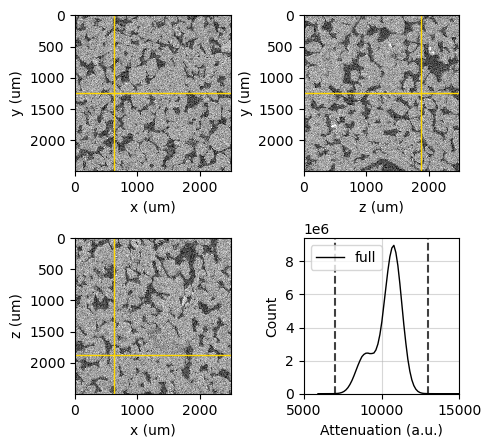

In [37]:
# Enable the visibility of the guide lines
viewer.show_guide_lines = True

# Print the current guide line settings to the console
print(f'Current guide_line_dict: {viewer.guide_line_dict}')

# Update the guide line settings: set to solid gold lines with full opacity
viewer.update_guide_line_dict(linestyle='-', color='gold', alpha=1)

# Print the updated guide line settings to confirm the change
print(f'Updated guide_line_dict: {viewer.guide_line_dict}')

# Show the figure in the output
viewer.figure

Masks and Regions
-----------------

Masks and regions of interest can be applied to the image through the 
``mask`` and ``region`` attributes. Masks are typically used to highlight 
or exclude certain voxels based on specific criteria, while regions of 
interest define a spatial area within the image for detailed examination. 

Masked voxels and voxels outside the region of interest will be ignored 
when calculating the histogram, allowing for a more focused analysis of 
specific areas of the data.

Let's illustrate a region definition using a cylinder as an example:

[2025-01-09 12:36:18] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 11.18chunk/s]
[2025-01-09 12:36:18] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:01<00:00,  7.24chunk/s]


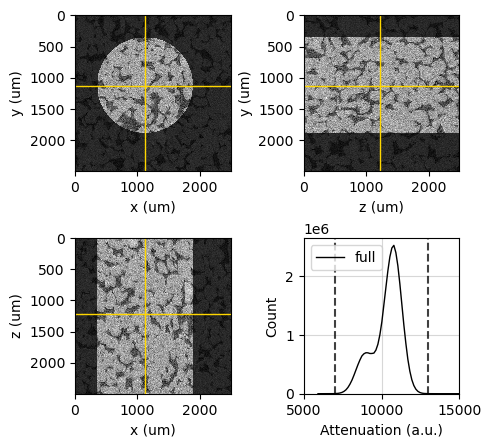

In [38]:
# Define a cylindrical region of interest
viewer.region = rv.region.Cylinder(p=(1125, 1125, 1225), r=750, v=(0, 0, 1))

# Set the reference point to the center of the defined region
viewer.ref_point = viewer.region.p

# Update the image color limits to focus on a specific range
viewer.update_image_dict(clim=(7000, 13000))

# Set the x-limits of the histogram to focus on a specific range
viewer.ax_histogram.set_xlim(5000, 15000)

# Show the figure in the output
viewer.figure

Masks and regions of interest will be combined into a single image mask. 
You can customize the mask overlay by adjusting the mask color and 
transparency (alpha) level, allowing you to highlight the masked areas 
effectively.

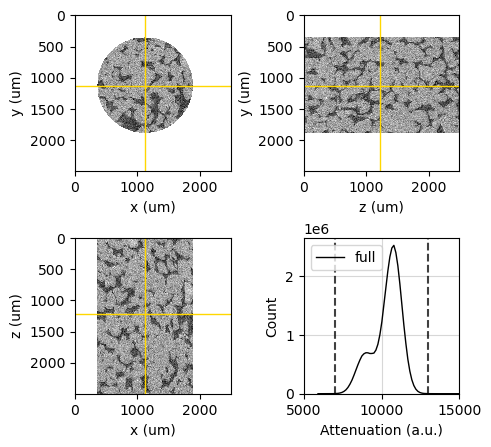

In [39]:
viewer.mask_color = 'white'
viewer.mask_alpha = 1
viewer.figure


Set the region or mask to ``None`` if you want to remove them from the ``OrthogonalViewer``.

[2025-01-09 12:36:22] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 36.96chunk/s]
[2025-01-09 12:36:22] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:02<00:00,  3.00chunk/s]


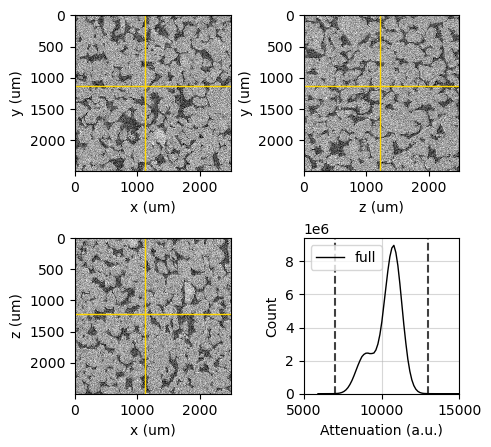

In [40]:
viewer.region = None
viewer.update_image_dict(clim=(7000, 13000))
viewer.ax_histogram.set_xlim(5000, 15000)
viewer.figure

Overlaying Segmentation
-----------------------

Set the segmentation using the ``segmentation`` attribute. This action will trigger 
the recalculation of the histogram and display each individual phase in the histogram 
plot, with colors matching the segmentation overlay colors. 

The segmentation helps to identify and visualize distinct regions within the voxel image, 
allowing for more targeted analysis of specific features or materials.

Let's use the Bentheimer segmentation data [imported before](./sample_data/import_bentheimer_sandstone.ipynb).

[2025-01-09 12:36:26] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 36.78chunk/s]
[2025-01-09 12:36:26] Histogram Attenuation (reading segmentation): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 96.33chunk/s]
[2025-01-09 12:36:26] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:02<00:00,  2.71chunk/s]


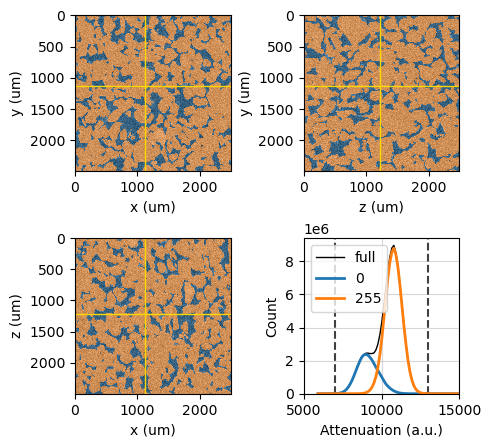

In [41]:
bentheimer_segmentation = rv.open('/path/to/imported/Bentheimer/segmented')
viewer.segmentation = bentheimer_segmentation
viewer.figure

Segmentation colors are assigned to each phase by cycling through a list of 
pre-defined colors. This means that if there are more segmentation phases than 
available colors, the colors will repeat, providing a visual distinction between 
the different phases.

You can see the assigned colors by inspecting the ``segmentation_colormap`` 
attribute, which holds the colormap used for the segmentation overlay.

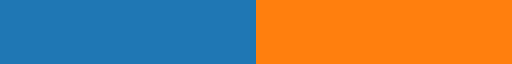

In [42]:
viewer.segmentation_colormap

Get a list of the predefined colors through the ``segmentation_colors`` attribute.

In [43]:
viewer.segmentation_colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

Note again that the length of the color list does not need to match the number of segmentation phases, 
as the color list will be cycled through. In this example, only the first two colors were used.

You can pass your own list of colors in any format accepted by Matplotlib:

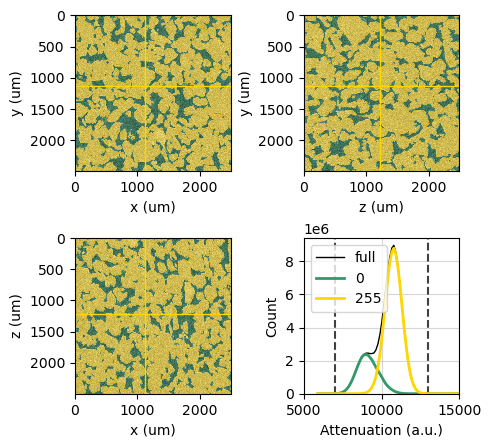

In [44]:
viewer.segmentation_colors = ('#339966', 'gold', (0, 0.5, 0.9))
viewer.figure

You can also directly use one of Matplotlib's qualitative colormaps for the segmentation colors:

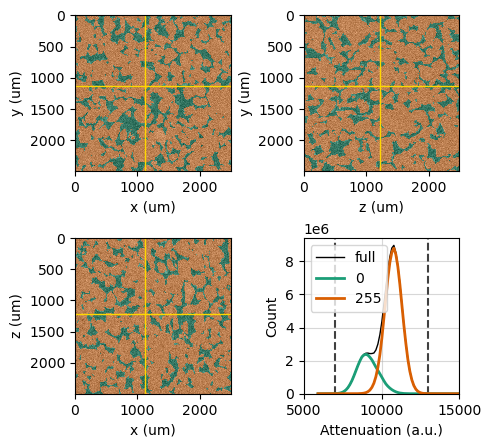

In [45]:
viewer.segmentation_colors = 'Dark2'
viewer.figure

Adjust the segmentation overlay transparency level using the ``segmentation_alpha`` attribute. 
This attribute controls the alpha (transparency) value of the segmentation overlay displayed 
on the image slices. The value must be a float between 0.0 and 1.0, where 0.0 is fully 
transparent (invisible) and 1.0 is fully opaque (completely visible). Adjusting the 
transparency level allows for better visualization of the underlying image data along with 
the segmented regions.

Old alpha = 0.5
New alpha = 0.15


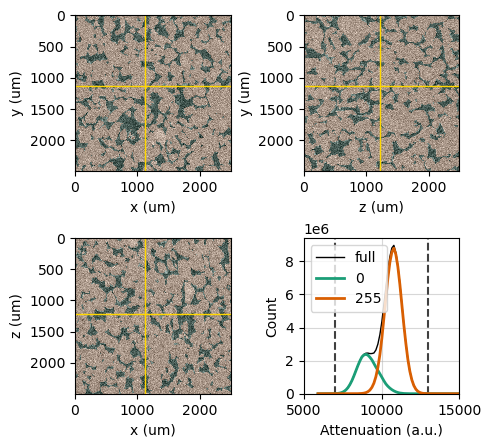

In [46]:
print(f"Old alpha = {viewer.segmentation_alpha}")
viewer.segmentation_alpha = 0.15
print(f"New alpha = {viewer.segmentation_alpha}")
viewer.figure


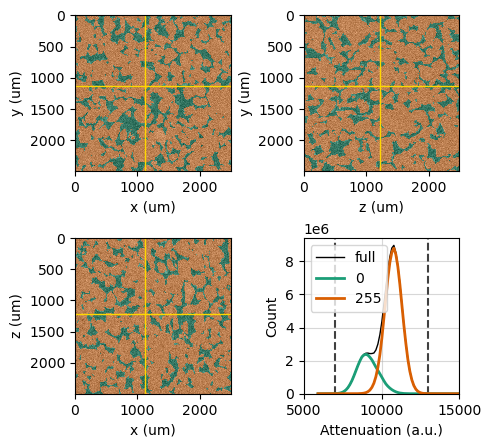

In [47]:
viewer.segmentation_alpha = 0.5
viewer.figure

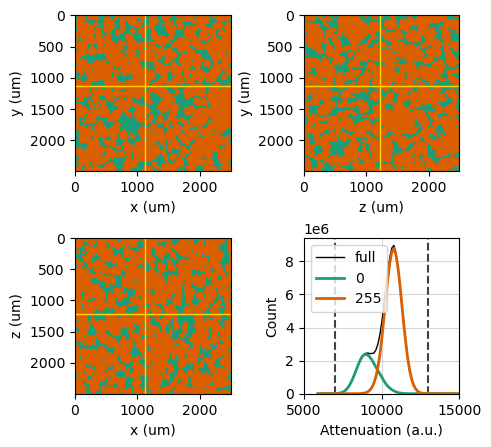

In [48]:
viewer.segmentation_alpha = 1
viewer.figure

Customizing histogram lines
---------------------------

The ``OrthogonalViewer`` class uses a dictionary of Matplotlib ``Line2D`` properties 
to customize the appearance of the histogram lines. These properties allow you to control 
various aspects of the lines, such as color, line style, line width, and transparency.
These properties are specified in the `histogram_line_dict` attribute:

In [49]:
print(f'''
full: {viewer.histogram_line_dict['full']},
phases: {viewer.histogram_line_dict['phases']},
clim: {viewer.histogram_line_dict['clim']},
''')


full: {'color': 'k', 'linewidth': 1, 'linestyle': '-'},
phases: {'linewidth': 2, 'linestyle': '-'},
clim: {'color': 'k', 'linestyle': '--', 'alpha': 0.75},



You can change these properties using the ``update_histogram_line_dict`` method:

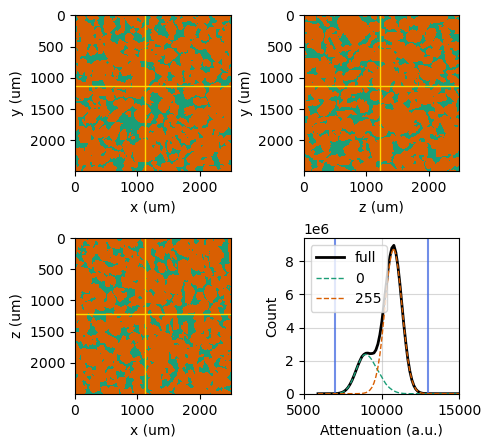

In [50]:
viewer.update_histogram_line_dict({
    'full': {'linewidth': 2},
    'phases': {'linewidth': 1, 'linestyle': '--'},
    'clim': {'color': 'royalblue', 'linestyle': '-'},
})
viewer.figure

For individual customization, all the Matplotlib ``Line2D`` objects are available as a 
dictionary in the ``histogram_lines`` attribute and can be individually accessed:

In [51]:
viewer.histogram_lines

{'cmin': <matplotlib.lines.Line2D at 0x28282e037a0>,
 'cmax': <matplotlib.lines.Line2D at 0x282838399a0>,
 'full': <matplotlib.lines.Line2D at 0x28282e03ce0>,
 '0': <matplotlib.lines.Line2D at 0x2828381fb90>,
 '255': <matplotlib.lines.Line2D at 0x2828381ed80>}

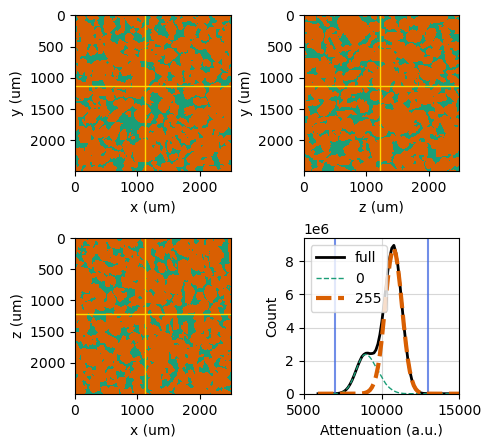

In [52]:
viewer.histogram_lines['255'].set(linewidth=3)

# If you customize individual lines, you need to
# manually update the legend
viewer.ax_histogram.legend()

viewer.figure


Careful! Overcustomization can lead to ugly results... 
Let's rebuild our plot with some reasonable settings to keep things simple.

Remember, you can pass all the customization options right when you create the 
class instance, which saves you time on histogram recalculations and helps you 
set everything up nicely from the start.

[2025-01-09 12:36:34] Histogram Attenuation (min/max): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 39.46chunk/s]
[2025-01-09 12:36:35] Histogram Attenuation (reading segmentation): 100%|>>>>>>>>>>| 8/8 [00:00<00:00, 117.52chunk/s]
[2025-01-09 12:36:35] Histogram Attenuation (counting voxels): 100%|>>>>>>>>>>| 8/8 [00:02<00:00,  2.71chunk/s]


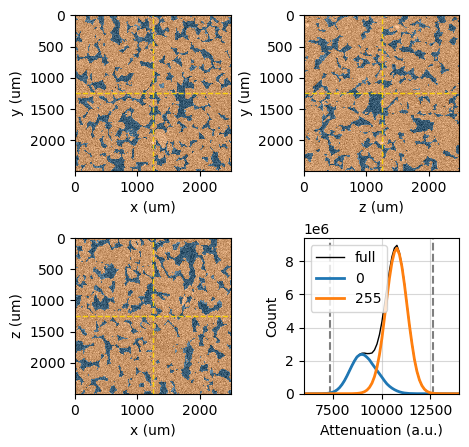

In [53]:
viewer = rv.OrthogonalViewer(image=bentheimer_ct,
                             segmentation=bentheimer_segmentation,
                             ref_point=(1250, 1250, 1250),
                             segmentation_alpha=0.4,
                             guide_line_dict={'color': 'gold', 'alpha': 0.9},
                             histogram_line_dict={'clim': {'color': 'k', 'alpha': 0.5}}
                             )
_ = viewer.ax_histogram.set_xlim(6000, 14000)

Planes and layout
-----------------

We can choose which planes to show and configure the grid layout through the following attributes:

- ``show_xy_plane``: Boolean flag to enable or disable the visibility of the XY slice.
- ``show_xz_plane``: Boolean flag to enable or disable the visibility of the XZ slice.
- ``show_zy_plane``: Boolean flag to enable or disable the visibility of the ZY slice.
- ``show_histogram``: Boolean flag to control the visibility of the histogram plot.
- ``layout``: Defines the arrangement of the components. Options include:
  - '2x2': Arranges the slices and histogram in a 2x2 grid.
  - 'horizontal': Places the slices and histogram in a horizontal layout.
  - 'vertical': Stacks the slices and histogram vertically.

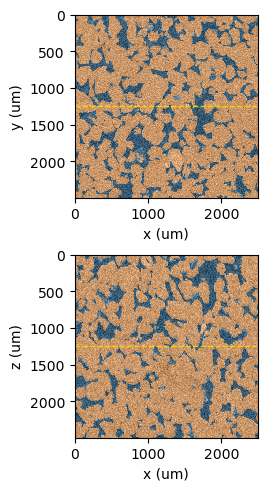

In [54]:
viewer.layout='2x2'
viewer.show_xy_plane = True
viewer.show_xz_plane = True
viewer.show_zy_plane = False
viewer.show_histogram = False
viewer.figure

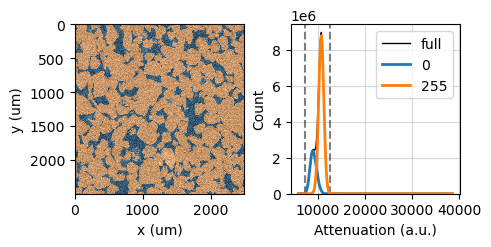

In [55]:
viewer.layout='horizontal'
viewer.show_xy_plane = True
viewer.show_xz_plane = False
viewer.show_zy_plane = False
viewer.show_histogram = True
viewer.figure

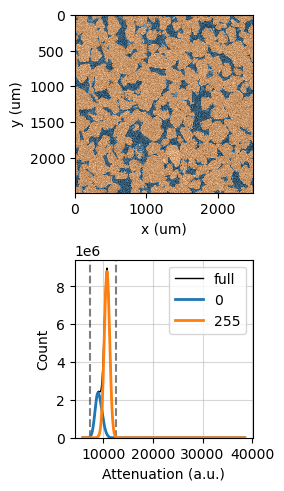

In [56]:
viewer.layout='vertical'
viewer.show_xy_plane = True
viewer.show_xz_plane = False
viewer.show_zy_plane = False
viewer.show_histogram = True
viewer.figure

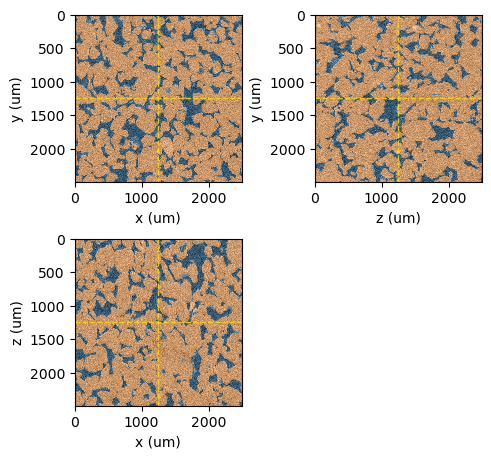

In [57]:
viewer.layout='2x2'
viewer.show_xy_plane = True
viewer.show_xz_plane = True
viewer.show_zy_plane = True
viewer.show_histogram = False
viewer.figure

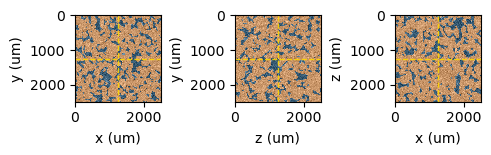

In [58]:
viewer.layout='horizontal'
viewer.show_xy_plane = True
viewer.show_xz_plane = True
viewer.show_zy_plane = True
viewer.show_histogram = False
viewer.figure

The guide lines will be shown or hidden according to the visible planes.